In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel 
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

ShapEV, Bin CAO, HKUST(GZ)
URL : https://github.com/Bin-Cao/ShapEV
Citation: 
Journal of Materials Informatics, 2022, 2(2): 4
http://dx.doi.org/10.20517/jmi.2022.04
Executed on : 2024-11-06 17:21:57  | Have a great day.
Optimized best parameters: {'gamma': 4.943643909777214, 'learning_rate': 0.19095922065309387, 'max_depth': 4, 'n_estimators': 191}
No feature set assigned. ShapEV will search all potential combinations.
A subset containing a total of 3 has been screened.
Equivalent value: y = -86.6312 + 0.0426 * Ust + 1.6588 * Time + 0.0521 * Power
R² is 0.9580
Optimized best parameters: {'gamma': 0.2538426551969847, 'learning_rate': 0.27598514468519797, 'max_depth': 2, 'n_estimators': 115}


<Figure size 3000x3000 with 0 Axes>

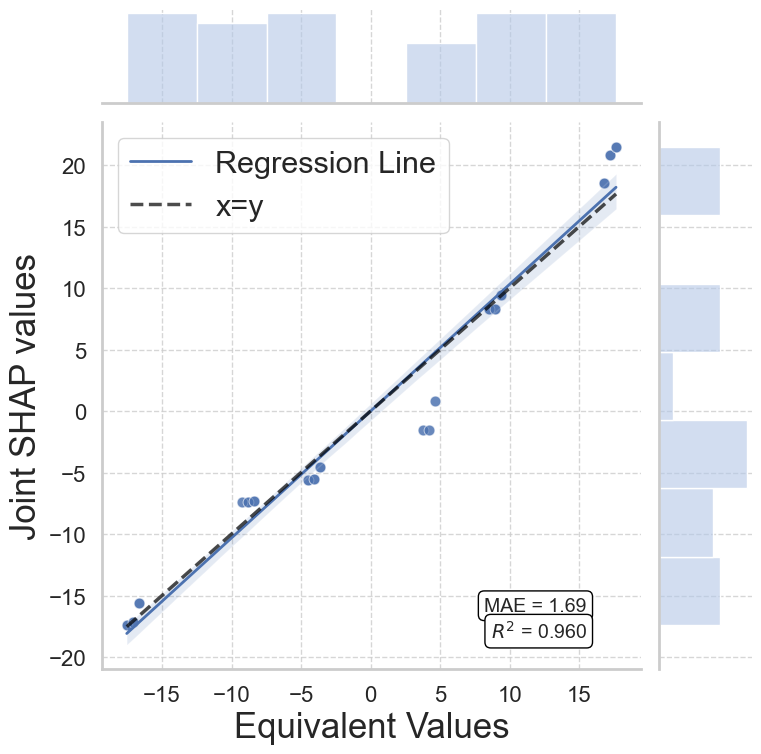

Equivalent CSV file has been saved: equivalent_values.csv


True

In [12]:
from ShapEV import EVsearch

# Instantiate the ShapEV model
model = EVsearch.EVkit('data.csv')

# Train the model and calculate joint SHAP values
model_type = 'XGBoost'  # Options: 'GradientBoosting', 'RandomForest', 'LightGBM', 'XGBoost'
model.fit(model_type)


model.shap(SPACE=7)

C:\Users\binja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\binja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 3000x3000 with 0 Axes>

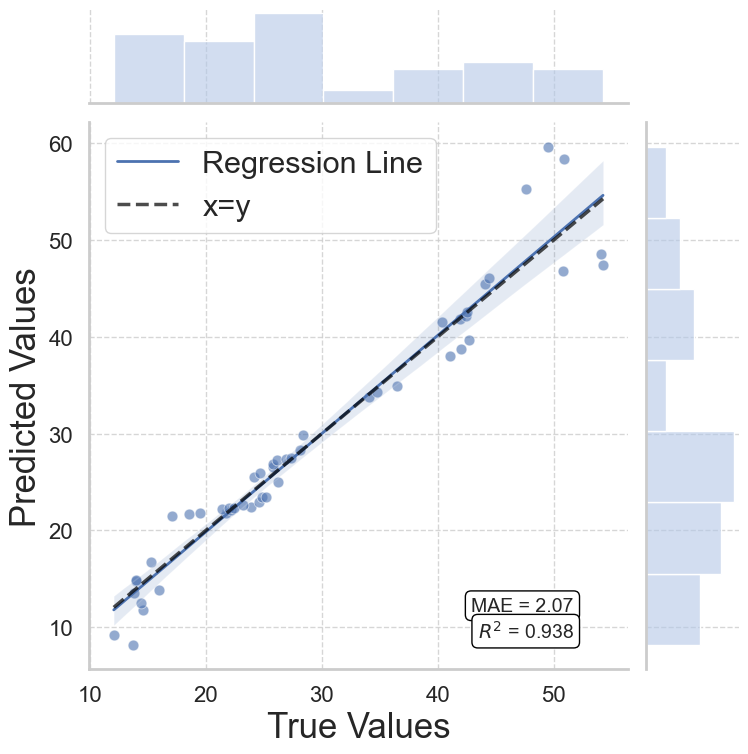

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score


# Define true and predicted values
y_true = ypre
y_pred = Y 

# Calculate R-squared and MAE values
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Create DataFrame for plotting
data = pd.DataFrame({
    'True': y_true,
    'Predicted': y_pred,
    'Data Set': 'All'
})

# Custom color palette
palette = {'All': '#4c72b0'}  # Nature-like blue tone

# Set font properties to Arial and adjust font sizes
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 24

# Create a JointGrid object
plt.figure(figsize=(6, 6), dpi=500)
g = sns.JointGrid(data=data, x="True", y="Predicted", height=8)

# Plot the scatter plot
g.plot_joint(sns.scatterplot, alpha=0.6, s=60, color=palette['All'])

# Add regression line
sns.regplot(data=data, x="True", y="Predicted", scatter=False, ax=g.ax_joint,
            color='#4c72b0', line_kws={"lw": 2}, label='Regression Line')

# Plot the marginal histograms
g.plot_marginals(sns.histplot, kde=False, element='bars', color='#b4c7e7', alpha=0.6)

# Add text for R^2 and MAE
ax = g.ax_joint
ax.text(0.9, 0.1, f'MAE = {mae:.2f}', transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
ax.text(0.9, 0.05, f'$R^2$ = {r2:.3f}', transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Add y=x line for comparison
ax.plot([data['True'].min(), data['True'].max()], 
        [data['True'].min(), data['True'].max()], c="black", alpha=0.7, linestyle='--', label='x=y')

# Set x and y axis labels with custom font sizes
g.ax_joint.set_xlabel('True Values', fontsize=25)
g.ax_joint.set_ylabel('Predicted Values', fontsize=25)

# Add legend
ax.legend(fontsize=22,loc=2)

# Save the figure
plt.savefig('mp1.png', dpi=500)
plt.savefig('mp1.svg', dpi=500)
plt.show()